In [1]:
%matplotlib ipympl
import glob
import pandas as pd
import numpy as np
import scipy
import librosa


import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import identification.dataset

In [16]:
config = {
    "frame_size": 2048,
    "hop_ratio": 4,
    "n_coeff": 100,
    "sr": 16000,
    "sample_duration": 60,
    "feature": "LTAS_welch_db",
}


data = pd.read_pickle("/home/hugo/Thèse/identification/data/processed/dataset_cnsm.pkl")
data = data[(data.violin.isin(["A", "B", "C"]))]
data = data[data.session.isin([1, 3])]
data = data[data.extract == "tchai"]
data.violin = data.violin.map({"A": "Klimke", "B": "Levaggi", "C": "Stoppani"})

features = identification.dataset.get_dataset(config, data)

100%|██████████| 146/146 [00:04<00:00, 29.57it/s]

          start          end    violin    condition extract  \
0   1287.128526  1307.190567   Levaggi      aveugle   tchai   
1    938.829206   962.977959    Klimke  non-aveugle   tchai   
2   1685.954467  1707.874104  Stoppani  non-aveugle   tchai   
3   2379.580952  2402.243628  Stoppani      aveugle   tchai   
4   2995.559909  3016.364989    Klimke      aveugle   tchai   
..          ...          ...       ...          ...     ...   
87  1236.607056  1266.409319  Stoppani  non-aveugle   tchai   
88  1526.391683  1559.792347    Klimke  non-aveugle   tchai   
89  2468.172959  2499.672842  Stoppani      aveugle   tchai   
90  2671.350640  2701.476713    Klimke      aveugle   tchai   
91  2875.857098  2905.107777   Levaggi      aveugle   tchai   

                                                 file  player  session  \
0   /home/hugo/Thèse/Data/CNSM/Session 1/Enregistr...    Paul        1   
1   /home/hugo/Thèse/Data/CNSM/Session 1/Enregistr...  Renato        1   
2   /home/hugo/Thèse/

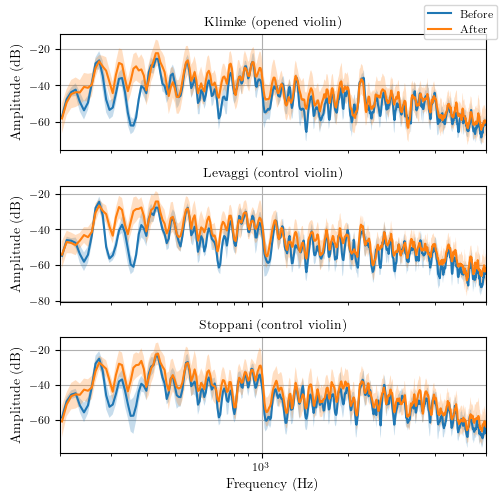

In [19]:
def std(group):
    group = np.vstack(group)
    std = np.std(group, axis=0)
    return std


f = np.arange(len(features.features[0])) / len(features.features[0]) * config["sr"] / 2
# f = np.arange(len(features.features[0]))
# Plot only between f1 and f2
mask = (f > 200) & (f < 6000)
# mask = f > 0

color = {"Klimke": "blue", "Levaggi": "orange", "Stoppani": "green"}


mpl.style.use("/home/hugo/Thèse/common/styles.mplstyle")
fig, axs = plt.subplots(3, 1, sharex=True, figsize=(5, 5))
stats = features.groupby(["violin", "session"])["features"].agg(["mean", std])

for i, row in stats.iterrows():
    violin, session = row.name
    ax = list(color.keys()).index(violin)
    axs[ax].plot(
        f[mask],
        row["mean"][mask],
    )
    axs[ax].fill_between(
        f[mask],
        row["mean"][mask] + row["std"][mask],
        row["mean"][mask] - row["std"][mask],
        alpha=0.25,
        # color=color[violin],
        label="_nolegend_",
    )
    axs[ax].set_title(
        f"{violin}{" (opened violin)" if violin == "Klimke" else " (control violin)"}"
    )
    axs[ax].set_xscale("log")
    axs[ax].set_xlim([200, 6000])
    axs[ax].set_ylabel("Amplitude (dB)")
    axs[ax].grid(True)

axs[-1].set_xlabel("Frequency (Hz)")
fig.legend(("Before", "After"))
# fig.suptitle("Admittances before and after the opening phase for each violin")
fig.savefig("../reports/figures/ltas.png")

In [113]:
for violin in ["Klimke", "Levaggi", "Stoppani"]:
    print(violin)
    s1 = stats.loc[(violin, 1)]["mean"][mask]
    s2 = stats.loc[(violin, 2)]["mean"][mask]
    s3 = stats.loc[(violin, 3)]["mean"][mask]
    print(np.linalg.norm(s1 - s2))
    print(np.linalg.norm(s1 - s3))

Klimke
5.466087501563867
9.820619914981265
Levaggi
6.448714687191426
8.31130758408906
Stoppani
4.581240844016987
7.540386268615032
